In [10]:
import tensorflow as tf
from graphviz import Digraph

from models import get_simple_cnn

In [2]:
model = get_simple_cnn((28,28,1), 10)

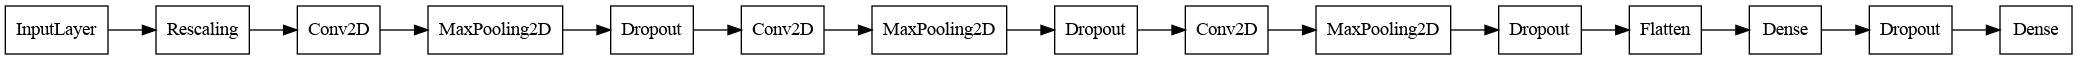

In [12]:
tf.keras.utils.plot_model(model, show_layer_names=False, rankdir='LR')

In [40]:
def plot_model(model, layers_per_line=5):
    layers = [{'name': 'Input', 'label': 'Input'}] + [{'name': layer.name, 'label': layer.__class__.__name__} for layer in model.layers]

    dot = Digraph(format='png')
    dot.attr(rankdir='LR')  # Left-to-right for rows
    dot.attr('node', shape='box', style='rounded, filled', color='lightblue', fontname='Helvetica')

    # Track rows and connections
    num_layers = len(layers)
    row_groups = [layers[i:i + layers_per_line] for i in range(0, num_layers, layers_per_line)]
    for row_idx, row in enumerate(row_groups):
        for layer in row:
            dot.node(**layer)
        # Connect the last node of the current row to the first node of the next row
        if row_idx < len(row_groups) - 1:
            dot.edge(row[-1]['name'], row_groups[row_idx + 1][0]['name'], constraint='false')

    # Connect within each row
    for row in row_groups:
        for i in range(len(row) - 1):
            dot.edge(row[i]['name'], row[i + 1]['name'])

    # Render and save the plot
    return dot


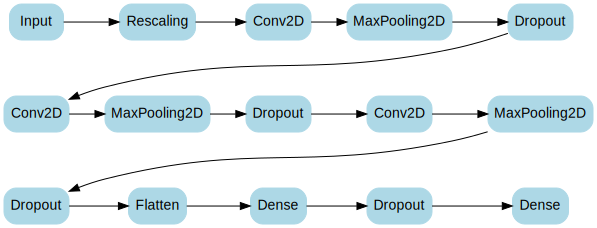

In [42]:
dot = plot_model(model)
dot